# Параметр Тумре

In [1]:
import os
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.interpolate as inter

In [3]:
import functions

importing Jupyter notebook from functions.ipynb
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
Distance = 9.3 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [5]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [6]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [7]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max = np.zeros(dist_kpc.shape)
Qeff_min = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
print('Errors:{}'.format(errors))

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [8]:
np.save('./data/Qg.npy', Qg)
np.save('./data/Qs_min.npy', Qs_min)
np.save('./data/Qs_max.npy', Qs_max)
np.save('./data/Qeff_min.npy', Qeff_min)
np.save('./data/Qeff_max.npy', Qeff_max)
np.save('./data/bark.npy',bark)
np.save('./data/bark_max.npy',bark_max)

/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


Text(0.5, 1.0, '$H_{\\alpha}$')

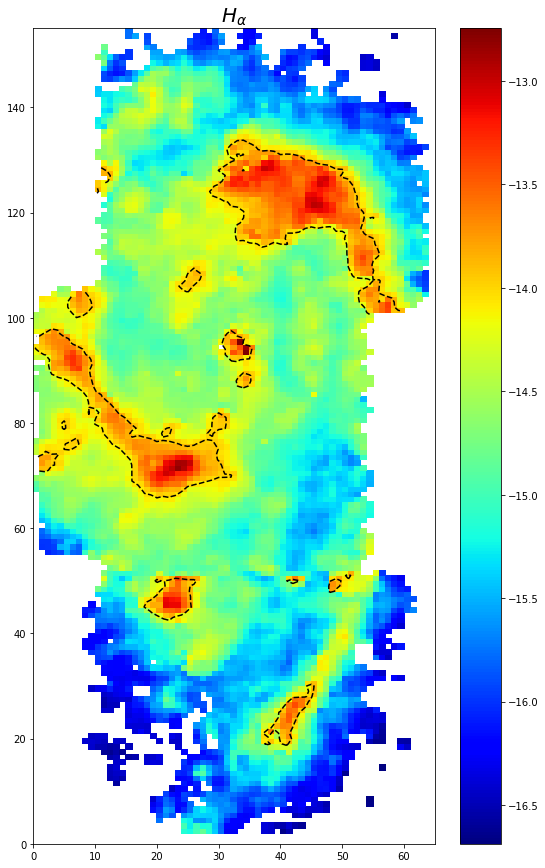

In [9]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, np.log10(H_alpha), cmap='jet')
plt.colorbar()
plt.title(r'$H_{\alpha}$', fontsize=20)

In [10]:
Qg = np.load('./data/Qg.npy')
Qs_min = np.load('./data/Qs_min.npy')
Qeff_min = np.load('./data/Qeff_min.npy')
Qs_max = np.load('./data/Qs_max.npy')
Qeff_max = np.load('./data/Qeff_max.npy')
bark = np.load('./data/bark.npy')
bark_max = np.load('./data/bark_max.npy')

Text(0.5, 1.0, '$\\bar{k}$')

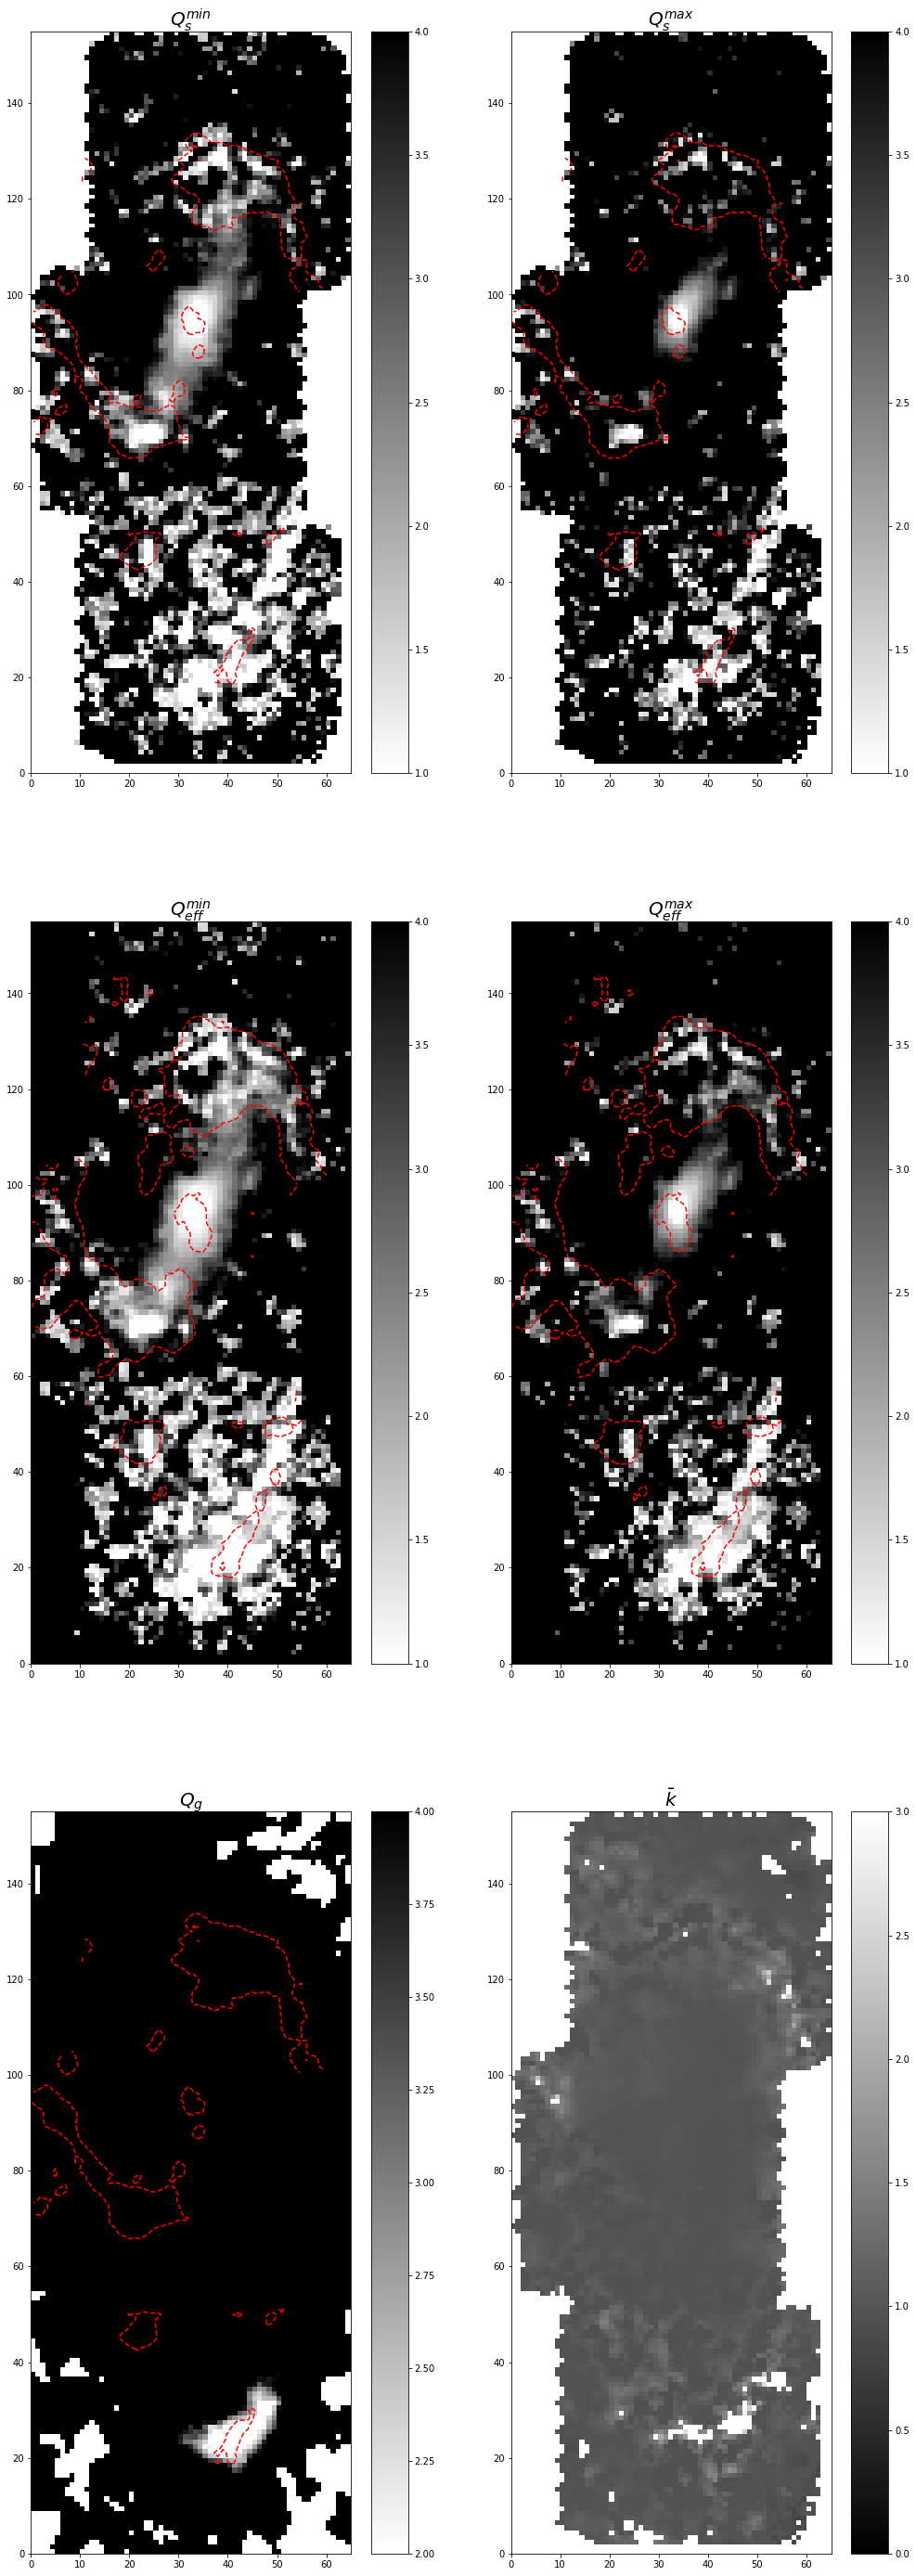

In [11]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 50])
plt.subplot(3,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qs_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{s}^{min}$', fontsize=20)

plt.subplot(3,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qs_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{s}^{max}$', fontsize=20)

plt.subplot(3,2,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(3,2,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(3,2,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qg, cmap='gist_yarg')
quadmesh.set_clim(vmin=2., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{g}$', fontsize=20)

plt.subplot(3,2,6)
quadmesh = plt.pcolormesh(X, Y, bark, cmap='gray')
quadmesh.set_clim(vmin=0., vmax=3.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\bar{k}$', fontsize=20)

Text(0.5, 1.0, '$Q_{eff}^{max}$')

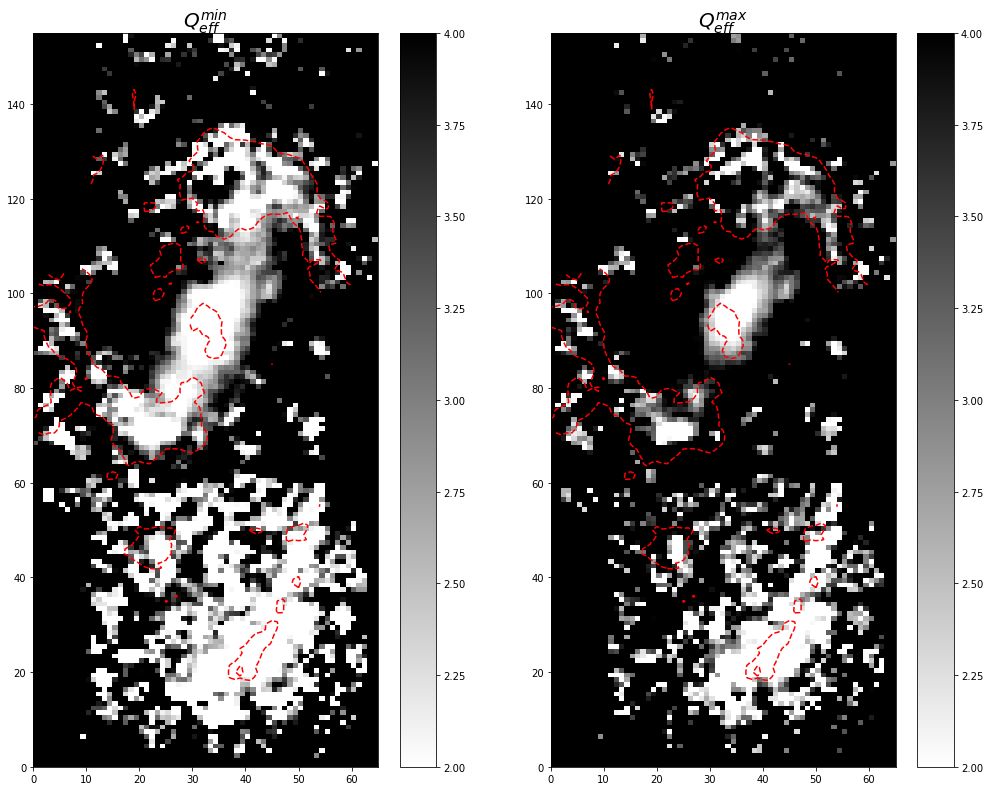

In [12]:

X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=2., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=2., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

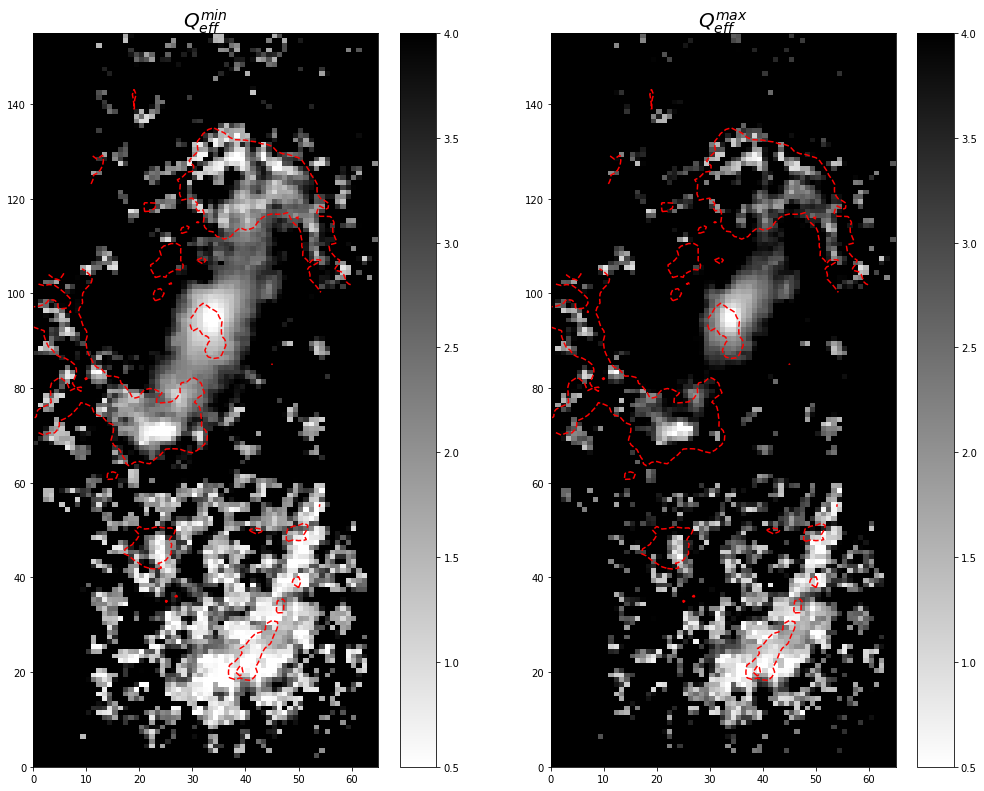

In [13]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

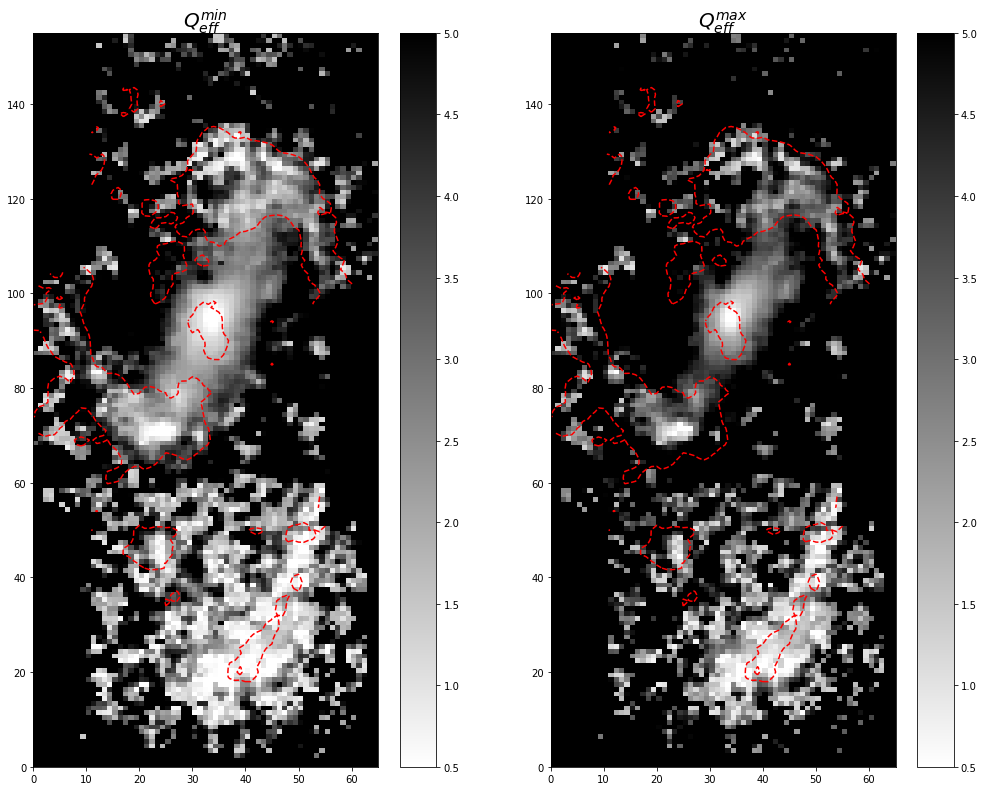

In [14]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=5.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=5.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

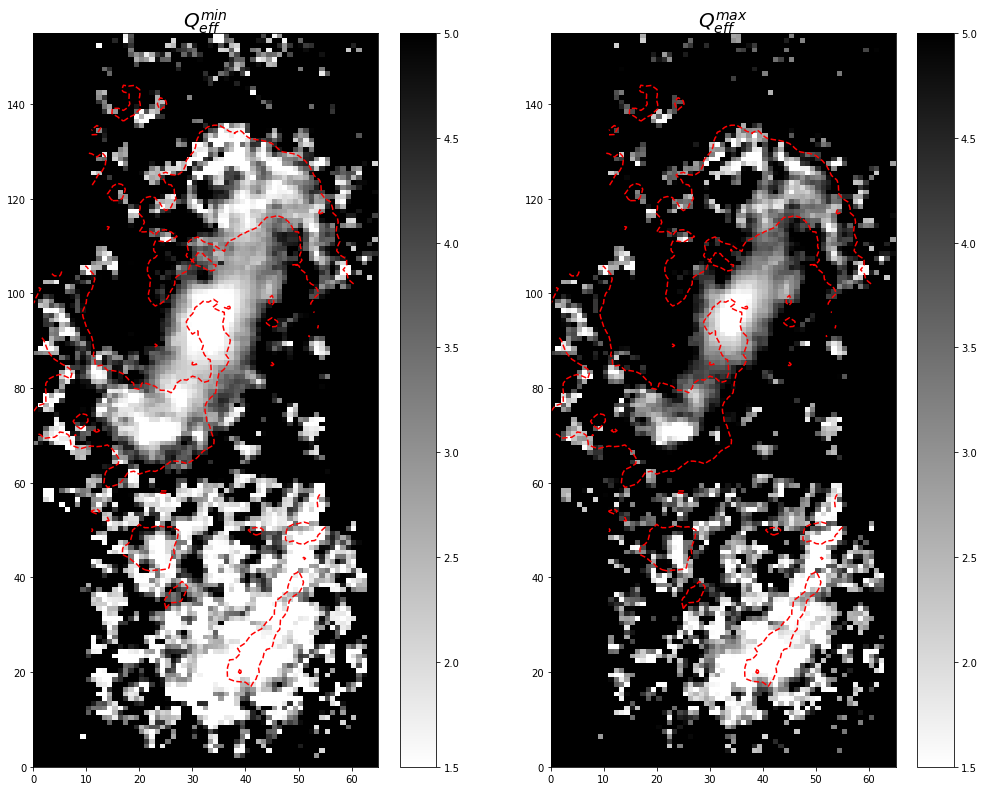

In [15]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.4,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1.5, vmax=5.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.4,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1.5, vmax=5.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

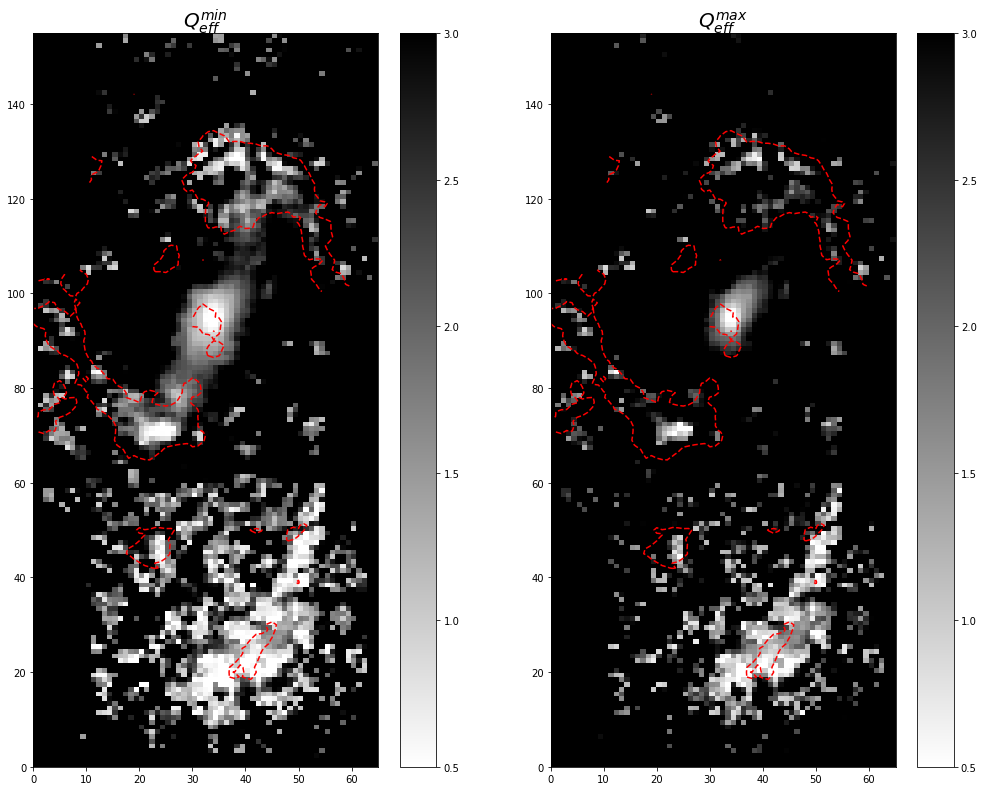

In [16]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.1,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=3.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.1,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=3.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

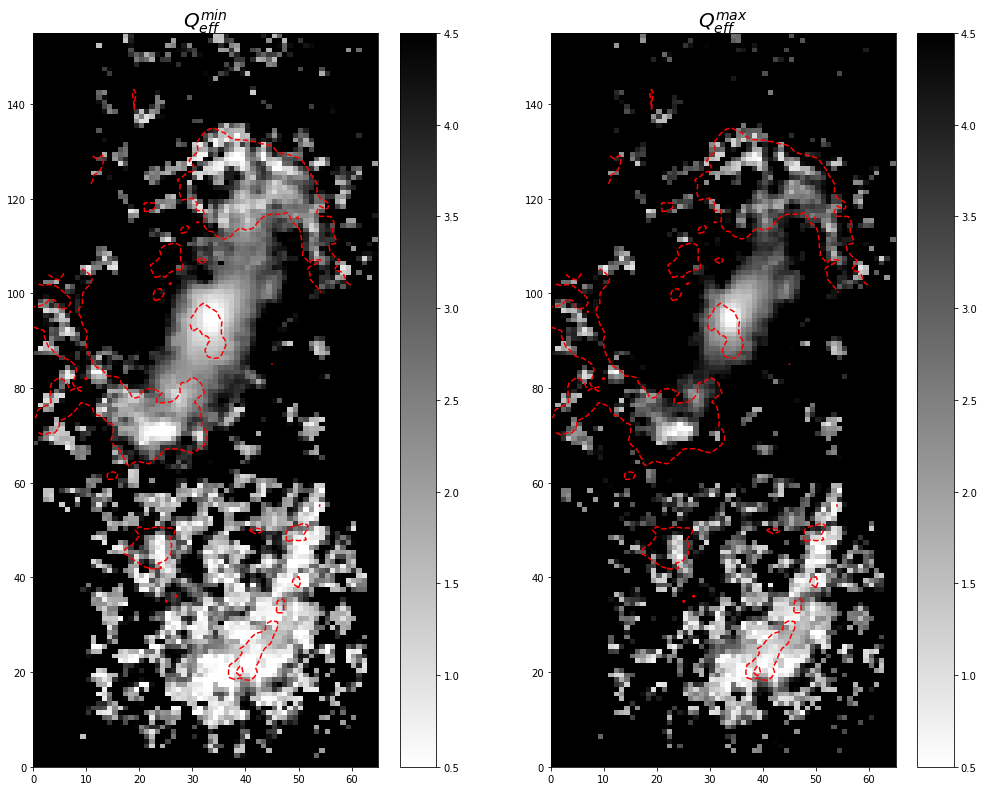

In [17]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.5)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.5)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

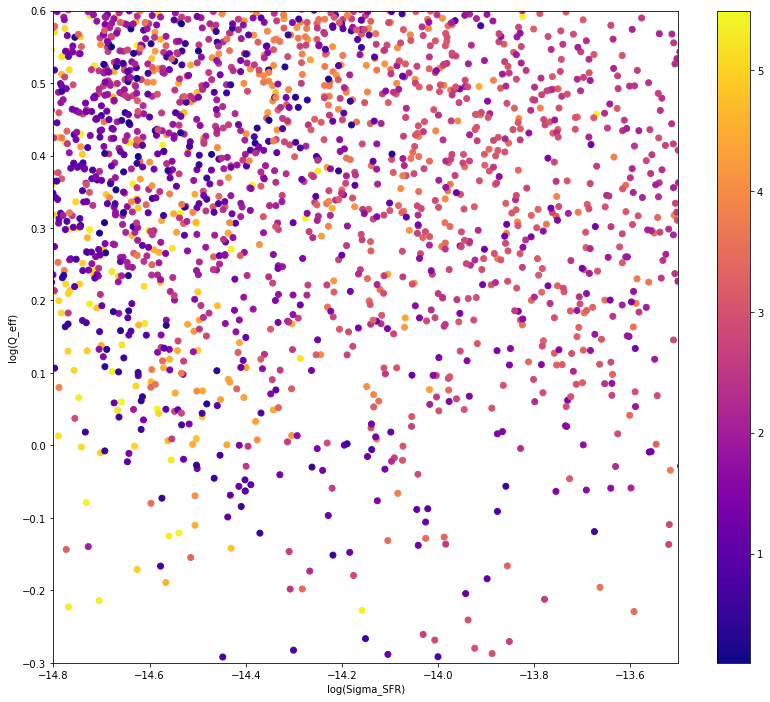

In [8]:
sigma_s = np.load('./data/sigma_s.npy')
H_alpha = np.load('./data/H_alpha.npy')
Qeff_min = np.load('./data/Qeff_min.npy')
dist_kpc = np.load('./data/dist_kpc.npy')
mask = (sigma_s != 0.) & (dist_kpc < 5.5) & (Qeff_min < 5)

# create data
x = np.log10(H_alpha[mask].ravel())
y = np.log10(Qeff_min[mask].ravel())
cmm = (cm.rainbow(np.linspace(0,1,100*len(x))))

# Make the plot
plt.figure(figsize=[14, 12])
# plt.hexbin(x, y, gridsize=100, bins='log', cmap='plasma', vmin=0.2, vmax=1.5)
sc = plt.scatter(x, y, c=[l for l in dist_kpc[mask].ravel()], cmap='plasma')
plt.ylim(-0.3, 0.6)
plt.xlim(-14.8, -13.5)
plt.colorbar(sc)
#plt.axhline(y=np.log10(3.), ls='--', color='g')
#plt.axvline(x=-2.3, ls='--', color='g')
# kslaw = 1.48
# kslaw_bias = 5.
# plt.plot([-4., -2.], [-4.*kslaw+kslaw_bias, -2.*kslaw+kslaw_bias], '--', lw=20, color='g')
plt.xlabel('log(Sigma_SFR)')
plt.ylabel('log(Q_eff)')
plt.show()

# Азимутальное усреднение

In [26]:
def azimuthal_average(Q, step=None, vmax=None, maxval=None, vmin=0.5):
    az_av = []
    az_dev = []
    for dbin in np.arange(vmin,vmax,step):
        mask = (dist_kpc >= dbin) & (dist_kpc <= dbin + step)
        anulli = Q[mask]
        mask = (anulli < maxval) & (anulli > 0.) 
        anulli = anulli[mask]
        az_av.append(anulli.sum()/mask.sum())
        az_dev.append(np.std(anulli))
    return az_av, az_dev

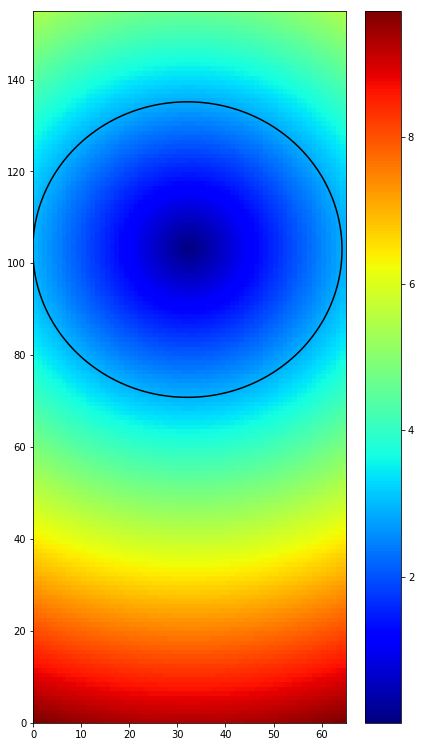

In [23]:
plt.figure(figsize=[7.,13.1])
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
CS = plt.contour(X, Y, dist_kpc, levels=[0.,2.9], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, dist_kpc, cmap='jet')
plt.colorbar()
#3.25 -масимальный радиус усреднения на кругу

In [24]:
Qeff_min = np.load('./data/Qeff_min.npy')
Qeff_max = np.load('./data/Qeff_max.npy')
Qg = np.load('./data/Qg.npy')
shear_method = np.load('./data/shear_method.npy')

In [27]:
plt.figure(figsize=[14,10])
for ind, Q in enumerate([Qeff_min, Qeff_max, Qg, shear_method]):
    label = ['Qeff_min', 'Qeff_max', 'Qg','shear_method'][ind]
    color = ['r', 'g', 'm','blue'][ind]
    az_av, az_dev = azimuthal_average(Q, step=0.5, vmax=10.)
    plt.plot(np.array(np.arange(0,10.,0.5)), az_av, ':', label=label, color=color)

plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 40.5);

TypeError: unorderable types: float() < NoneType()

<Figure size 1008x720 with 0 Axes>

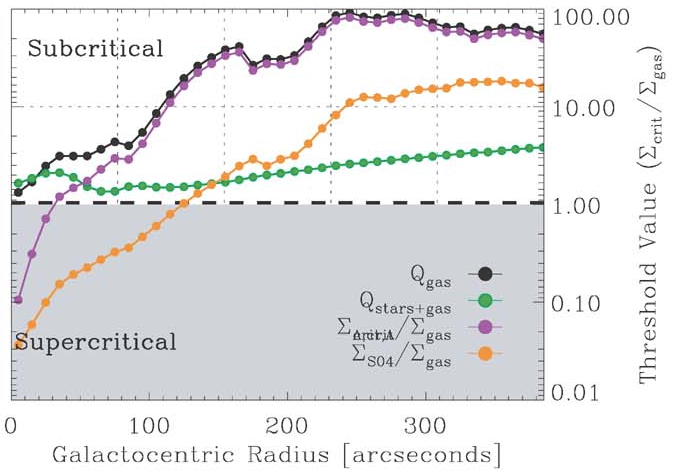

In [75]:
from IPython.display import Image
Image('./images/instability.png')

In [55]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [50]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [51]:
Sigma_H2_az = azimuthal_average(Sigma_H2, step=0.5, vmax=11., maxval = 140.)[0]
sigma_HI_az = azimuthal_average(sigma_HI/1000., step=0.5, vmax=11., maxval = 100.)[0]
Sigma_HI_az = azimuthal_average(Sigma_HI, step=0.5, vmax=11., maxval = 7.)[0]
Sigma_s_az = azimuthal_average(Sigma_s, step=0.5, vmax=11., maxval = 4000.)[0]
sig_R_max_az = azimuthal_average(sig_R_max, step=0.5, vmax=11., maxval = 300.)[0]
sig_R_min_az = azimuthal_average(sig_R_min, step=0.5, vmax=11., maxval = 300.)[0]
dist_az = np.array(np.arange(0.5,11.,0.5))

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [52]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32

Qeff_max_az = np.zeros(dist_az.shape)
Qeff_min_az = np.zeros(dist_az.shape)
Qg_az = np.zeros(dist_az.shape)
Qs_max_az = np.zeros(dist_az.shape)
Qs_min_az = np.zeros(dist_az.shape)
error = 0
step = 0
for i, ddd in enumerate(np.arange(0.5, 11., 0.5)):
    step+=1
    c = sigma_HI_az[i]
    Sigma_g = 1.36*(Sigma_HI_az[i]+ Sigma_H2_az[i])
    kappa = functions.epic_freq(velocity_approx, ddd, dR)
    Sigma_s = Sigma_s_az[i]
    s_R_max = sig_R_max_az[i]
    s_R_min = sig_R_min_az[i]
    Qg_az[i] = kappa * c / (math.pi * G * Sigma_g)
    Qs_max_az[i] = kappa * s_R_max / (3.36 * G * Sigma_s)
    Qs_min_az[i] = kappa * s_R_min / (3.36 * G * Sigma_s)
        
    try:   
        root, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min_az[i], Qg=Qg_az[i], s=c/s_R_min)
    except:
        error+=1
        qeff = 0.01
    Qeff_min_az[i] = 1./qeff
    
    try: 
        root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max_az[i], Qg=Qg_az[i], s=c/s_R_min)
    except:
        error+=1
        qeff = 0.01
    Qeff_max_az[i] = 1./qeff
print(error)               

6


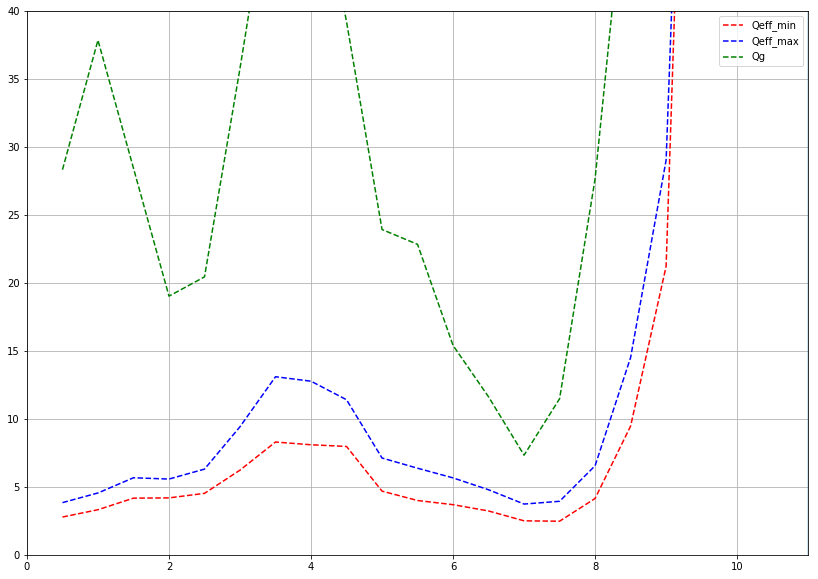

In [53]:
plt.figure(figsize=[14,10])
plt.plot(np.array(np.arange(0.5,11.,0.5)),Qeff_min_az, '--', label='Qeff_min', color='red')


plt.plot(np.array(np.arange(0.5,11.,0.5)),Qeff_max_az, '--', label='Qeff_max', color='blue')

plt.plot(np.array(np.arange(0.5,11.,0.5)),Qg_az, '--', label='Qg', color='green')
 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 40.);

Возьмём данные Лероя

In [34]:
dist_Leroy_eff_arcsec = [5.78, 15.60 ,25.43 ,35.26 ,45.66 ,55.49 ,65.31 ,75.72 ,85.54 ,95.37 ,105.20,115.60, 125.43, 
135.26,145.08,155.49,164.73,175.14,184.97,194.79,204.62,215.02,224.85,234.68,244.50,254.91,264.73,274.56,284.39,  294.79, 
304.62,315.02,324.85,334.68,343.93,354.91,364.73,374.56,384.39]
Qeff_Leroy  =[ 2.86, 3.23,  3.82, 3.83, 3.38, 2.48, 2.04, 2.11, 2.56, 2.56, 2.48, 2.49, 2.48, 2.63,2.86, 2.93, 3.23,
 3.38,  3.60, 3.75,3.97,4.04,4.27, 4.49, 4.64, 4.79, 4.86, 4.94, 5.16, 5.31, 5.31, 5.53, 5.54, 5.76, 5.83, 5.91,
 5.98, 6.13, 6.13]
Leroy_gas = [5.263157894736844, 1.6881578947368432,
14.619883040935676 ,2.595175438596492,
24.56140350877194, 4.177631578947372,
34.502923976608194, 5.085087719298249,
45.02923976608188, 5.017982456140352,
54.38596491228071, 5.100000000000003,
64.91228070175441, 5.782894736842108,
75.43859649122808, 6.390789473684212,
85.38011695906434, 6.098245614035088,
95.32163742690062, 7.380701754385967,
105.26315789473685, 9.113157894736844,
115.11627906976743,  21.63793103448276,
125.0,  37.155172413793096,
134.88372093023256,  48.79310344827586,
144.7674418604651,  58.103448275862064,
154.65116279069767,  65.08620689655172,
165.11627906976744,  68.9655172413793,
175.0,  50.3448275862069,
185.46511627906975,  56.55172413793103,
195.34883720930233,  55.775862068965516,
204.65116279069767,  59.6551724137931,
215.11627906976744,  72.06896551724138,
225.0,  87.58620689655173,
234.88372093023258,  97.67241379310344,
244.7674418604651,  100.77586206896552,
255.2325581395349,  96.89655172413794,
265.1162790697674,  96.12068965517241,
275.0,  98.44827586206897,
284.8837209302326,  100.0,
294.7674418604651,  96.12068965517241,
305.2325581395349,  89.91379310344828,
315.1162790697675,  86.8103448275862,
325.0,  86.8103448275862,
335.4651162790698,  79.82758620689656,
345.3488372093023,  83.70689655172414,
355.2325581395349,  85.25862068965517,
365.1162790697674,  86.03448275862068,
375.0,  83.70689655172414,
384.8837209302325,  79.82758620689656]

In [35]:
dist_Leroy_eff = [r * np.pi / (180 *3600) * Distance * 10**3 for r in dist_Leroy_eff_arcsec]

Leroy_gas[0::2] = [r * np.pi / (180 *3600) * Distance * 10**3 for r in Leroy_gas[0::2]]

(0, 12)

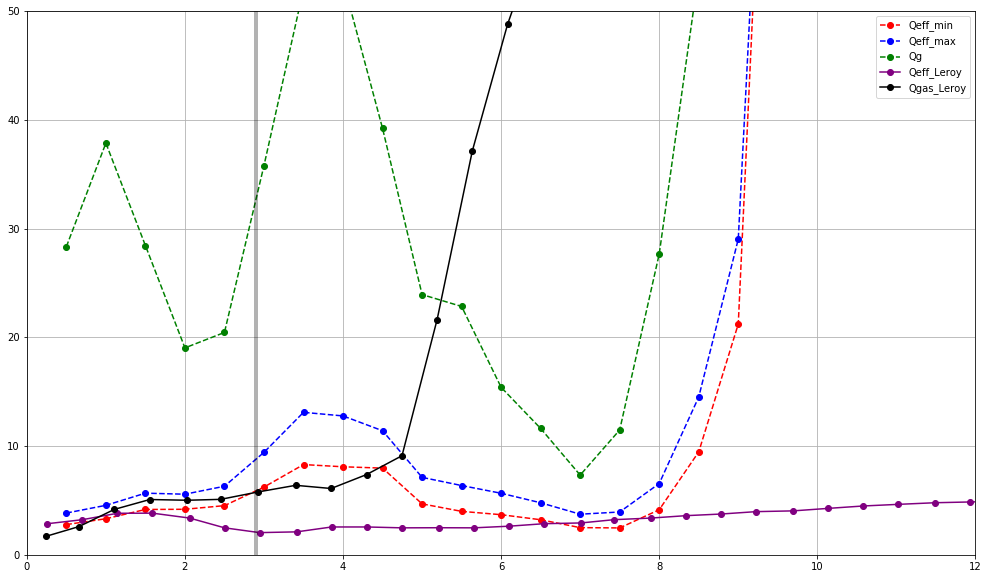

In [37]:
plt.figure(figsize=[17,10])
plt.plot(np.array(np.arange(0.5,11.,0.5)),Qeff_min_az, 'o--', label='Qeff_min', color='red')


plt.plot(np.array(np.arange(0.5,11.,0.5)),Qeff_max_az, 'o--', label='Qeff_max', color='blue')

plt.plot(np.array(np.arange(0.5,11.,0.5)),Qg_az, 'o--', label='Qg', color='green')
plt.plot(dist_Leroy_eff,Qeff_Leroy, 'o-', label='Qeff_Leroy', color='purple') 
plt.plot(Leroy_gas[0::2],Leroy_gas[1::2], 'o-', label='Qgas_Leroy', color='black')


plt.grid()
plt.legend()
plt.axvline(x=2.9, alpha=0.3, color='black', lw=4) # Граница усреднения по кругу 
plt.ylim(0, 50.)
plt.xlim(0,12)

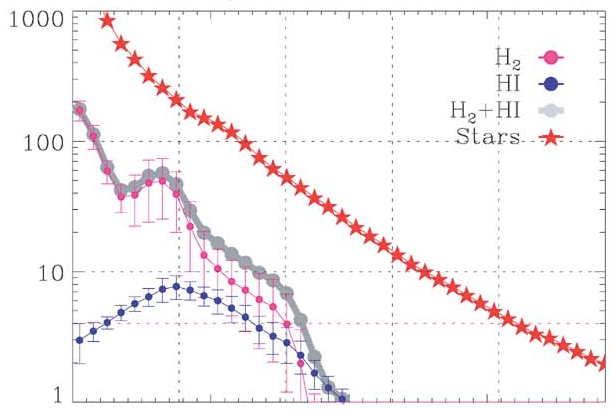

In [38]:
from IPython.display import Image
Image('./images/density.png')

In [58]:
Sigma_s_Leroy = [23.598233349907858,  846.0076724483293,
33.63654976746908,  567.7928824435597,
43.64561701131943,  433.3826375784002,
53.65760917254089,  326.56262656603906,
63.64912691216473,  269.2573689496928,
73.65234432127293,  210.87366509536247,
83.64971189563896,  169.4533969415193,
94.14139050571823,  154.8617398091692,
104.11828365848665,  136.16898877360853,
114.09517681125509,  119.73256613593385,
124.2105263157895,  96.21443268927803,
134.21052631578948,  75.35203264966117,
145.26315789473688,  60.55122100314917,
154.73684210526318,  52.56181956608316,
165.26315789473688,  43.899351080815435,
175.26315789473688,  37.13918782987277,
184.73684210526318,  31.42003785257203,
194.73684210526318,  26.24184786693744,
205.26315789473688,  21.63692455358421,
215.26315789473688,  18.782051055441148,
225.26315789473688,  15.486173980916927,
234.73684210526318,  13.793192726625698,
245.26315789473688,  11.372761243504481,
255.56437389770724,  9.623506263980897,
266.17577895355674,  8.4679401098553,
275.7289829512052,  7.451131400254735,
285.81422692533806,  6.473082037010402,
295.896531452087,  5.695810810737687,
306.51381540270427,  4.885273571519392,
316.59318048206933,  4.354004653656649,
326.1552028218695,  3.6869450645195774,
336.23750734861846,  3.24422607917163,
346.305114638448,  3.043219887107722,
356.91358024691357,  2.7122725793320295,
366.4609053497942,  2.448436746822227,
376.54320987654324,  2.1544346900318843,
386.6166960611405,  1.969901198590982
]

In [59]:
Sigma_H2_Leroy = [5.26315789473685,  171.53108722672815,
15.26315789473685,  109.20774884568348,
24.867724867724874,  58.99846085308591,
34.920634920634924,  37.65630843286818,
44.97354497354496,  38.09209011334099,
55.026455026455025,  47.28471246851614,
65.60846560846561,  49.06813253929407,
75.66137566137567,  38.92611260972658,
85.18518518518519,  22.144582139419853,
95.23809523809524,  13.428958386514637,
105.82010582010582,  10.517169735529139,
115.26315789473682,  8.360306936514649,
125.26315789473685,  7.3564225445964135,
135.78947368421052,  6.150195042752213,
145.26315789473685,  5.481367101558418,
155.78947368421055,  4.032325252111344,
165.26315789473682,  2.020949938191079
]

In [60]:
Sigma_HI_Leroy = [4.7368421052631575,  2.9645519440048984,
14.736842105263158,  3.451995138649937,
25.263157894736857,  4.0710609299344,
34.73684210526316,  4.801793824856349,
45.26315789473686,  5.590947061552852,
54.21052631578949,  6.346639928259899,
65.26315789473685,  7.2025350455855115,
75.26315789473685,  7.570979091031694,
84.73684210526318,  7.184615133964143,
84.73684210526318,  7.184615133964143,
94.73684210526318,  6.395109030978997,
104.73684210526318,  5.839874427780476,
115.26315789473685,  5.131722431574832,
124.73684210526318,  4.452723534191639,
134.73684210526315,  3.5778796745936434,
144.73684210526318,  3.1042669727473213,
154.73684210526318,  2.763143937681283,
164.73684210526315,  2.248842624731288,
174.73684210526318,  1.6312278211817017,
185.26315789473685,  1.2613009227352183,
194.73684210526315,  1.0135564768245204
]

In [62]:
Sigma_s_Leroy[0::2] = [r * np.pi / (180 *3600) * Distance * 10**3 for r in Sigma_s_Leroy[0::2]]
Sigma_HI_Leroy[0::2] = [r * np.pi / (180 *3600) * Distance * 10**3 for r in Sigma_HI_Leroy[0::2]]
Sigma_H2_Leroy[0::2] = [r * np.pi / (180 *3600) * Distance * 10**3 for r in Sigma_H2_Leroy[0::2]]


In [56]:
Sigma_H2_az, Sigma_H2_az_dev = azimuthal_average(1.36*Sigma_H2, step=0.5, vmax=11., maxval = 140.)
Sigma_HI_az, Sigma_HI_az_dev = azimuthal_average(1.36*Sigma_HI, step=0.5, vmax=11., maxval = 7.)
Sigma_s_az, Sigma_s_az_dev = azimuthal_average(Sigma_s, step=0.5, vmax=11., maxval = 4000.)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


(0.0, 12.0)

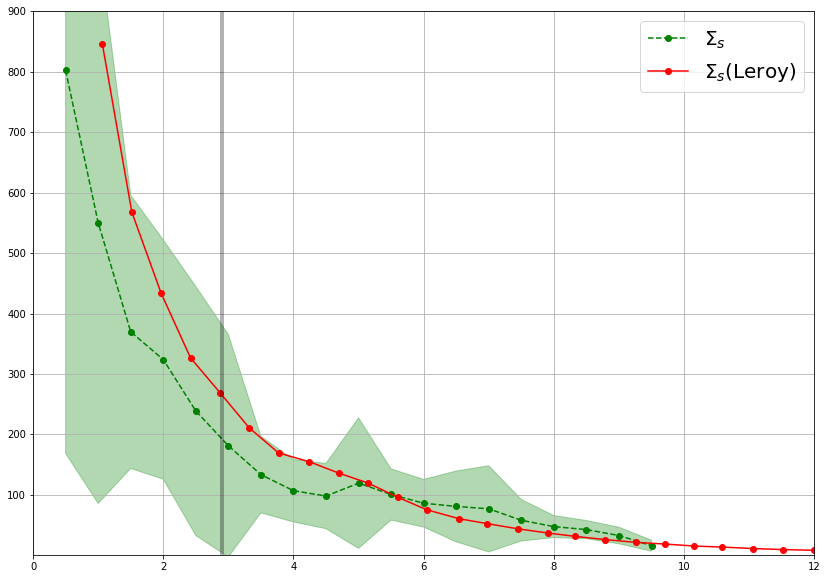

In [63]:
plt.figure(figsize=[14,10])
plt.plot(np.array(np.arange(0.5,11.,0.5)),Sigma_s_az, 'o--', label=r'$\Sigma_{s}$', color='green')
plt.fill_between(np.array(np.arange(0.5,11.,0.5)), 
                     np.array(Sigma_s_az) - np.array(Sigma_s_az_dev), 
                     np.array(Sigma_s_az) + np.array(Sigma_s_az_dev), alpha=0.3, color='green')
plt.plot(Sigma_s_Leroy[0::2],Sigma_s_Leroy[1::2], 'o-', label=r'$\Sigma_s$(Leroy)', color='red') 

plt.grid()
plt.legend(fontsize=20)
plt.axvline(x=2.9, alpha=0.3, color='black', lw=4) # Граница усреднения по кругу 
plt.ylim(1., 900.)
plt.xlim(0., 12.)

(0, 10.0)

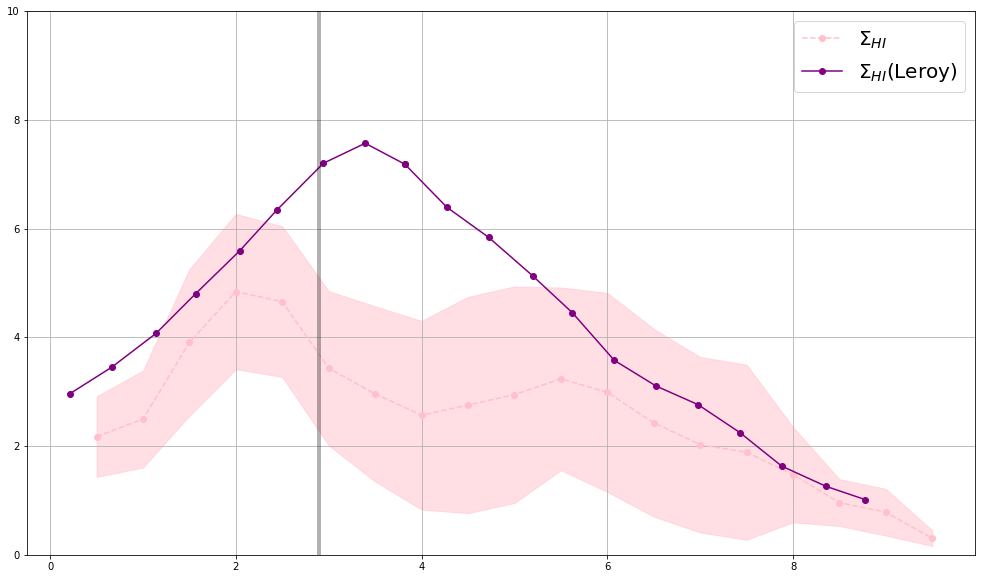

In [66]:
plt.figure(figsize=[17,10])
#Sigma_HI_az1=[Sigma_HI_az[i]*1.36 for i in range(len(Sigma_HI_az))]
plt.plot(np.array(np.arange(0.5,11.,0.5)),Sigma_HI_az, 'o--', label=r'$\Sigma_{HI}$', color='pink')
plt.fill_between(np.array(np.arange(0.5,11.,0.5)), 
                     np.array(Sigma_HI_az) - np.array(Sigma_HI_az_dev), 
                     np.array(Sigma_HI_az) + np.array(Sigma_HI_az_dev), alpha=0.5, color='pink')
plt.plot(Sigma_HI_Leroy[0::2],Sigma_HI_Leroy[1::2], 'o-', label=r'$\Sigma_{HI}$(Leroy)', color='purple')

plt.grid()
plt.legend(fontsize=20)
plt.axvline(x=2.9, alpha=0.3, color='black', lw=4)
plt.ylim(0, 10.)

(0, 140.0)

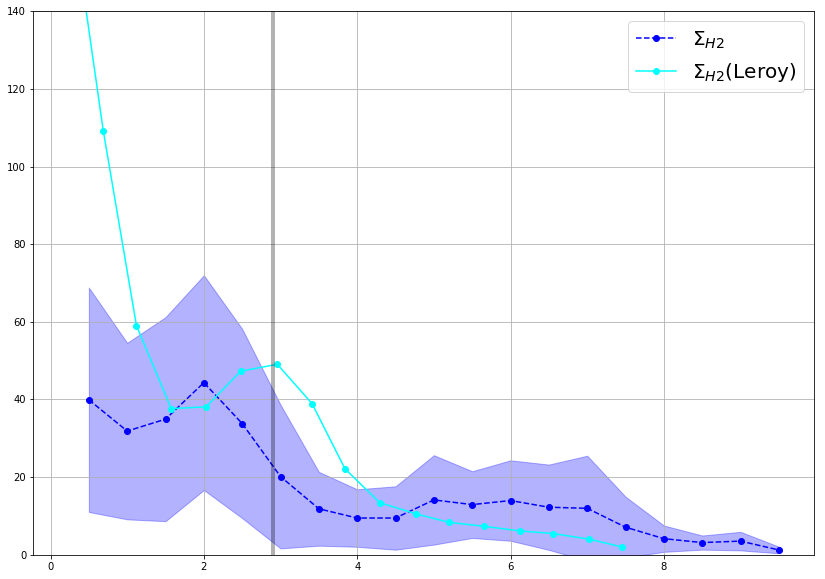

In [67]:
plt.figure(figsize=[14,10])

#Sigma_H2_az1=[Sigma_H2_az[i]*1.36 for i in range(len(Sigma_H2_az))]
plt.plot(np.array(np.arange(0.5,11.,0.5)),Sigma_H2_az, 'o--', label=r'$\Sigma_{H2}$', color='blue')
plt.fill_between(np.array(np.arange(0.5,11.,0.5)), 
                     np.array(Sigma_H2_az) - np.array(Sigma_H2_az_dev), 
                     np.array(Sigma_H2_az) + np.array(Sigma_H2_az_dev), alpha=0.3, color='blue')
plt.plot(Sigma_H2_Leroy[0::2],Sigma_H2_Leroy[1::2], 'o-', label=r'$\Sigma_{H2}$(Leroy)', color='aqua')


plt.grid()
plt.legend(fontsize=20)
plt.axvline(x=2.9, alpha=0.3, color='black', lw=4)
plt.ylim(0, 140.)